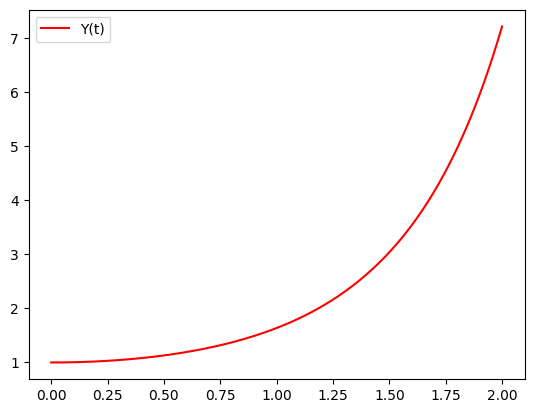

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def rk1(f, time, initial, h):
    points = np.arange(time[0], time[1]+h, h)  # divide the interval
    n = len(points)  # how many points here
    sol = np.zeros(n)  # where we store the solution for y
    sol[0] = initial  # if y is the solution then the first entry of sol is y(t_0)
    
    for i in range(1, n):
        values = {t: points[i - 1], y: sol[i - 1]}
        sol[i] = sol[i - 1] + h * f.subs(values)  # y_n = y_(n-1) + h*f(x_(n-1), y_(n-1))
    
    return sol

y, t = sp.symbols("y t")  # define variables
f = t * y  # y' = f(t, y)

time = [0, 2]  # interval of time
initial = 1  # y(t_0)
h = 0.01  # step size

Euler_sol = rk1(f, time, initial, h)  # calling the function

# Move this line to the correct indentation level
points = np.arange(time[0], time[1] + h, h)

fig, ax = plt.subplots()
ax.plot(points, Euler_sol, color="red", label="Y(t)")
ax.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (21,) and (201,)

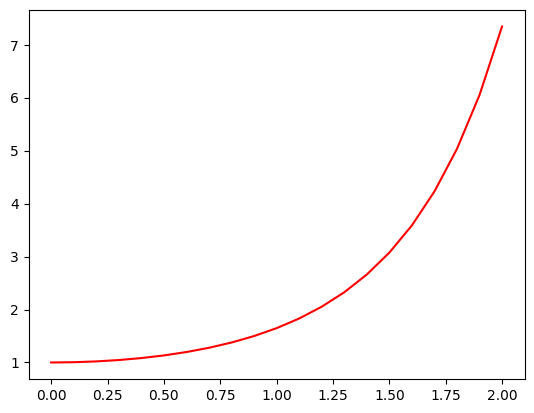

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
def rk1(f, time, initial, h):
    points = np.arange(time[0], time[1]+h, h)  # divide the interval
    n = len(points)  # how many points here
    sol = np.zeros(n)  # where we store the solution for y
    sol[0] = initial  # if y is the solution then the first entry of sol is y(t_0)
    
    for i in range(1, n):
        values = {t: points[i - 1], y: sol[i - 1]}
        sol[i] = sol[i - 1] + h * f.subs(values)  # y_n = y_(n-1) + h*f(x_(n-1), y_(n-1))
    
    return sol



Euler_sol = rk1(f, time, initial, h)  # calling the function

def rk2(f, time, initial, h):
    points = np.arange(time[0], time[1]+h, h)  # divide the interval
    n = len(points)  # how many points here
    sol = np.zeros(n)  # where we store the solution for y
    sol[0] = initial  # if y is the solution then the first entry of sol is y(t_0)
    
    for i in range(1, n):
        values = {t: points[i - 1], y: sol[i - 1]}
        k1=f.subs({t:points[i-1],y:sol[i-1]})
        k2=f.subs({t:(points[i-1]+h), y:(sol[i-1]+h*k1)})
        sol[i] = sol[i - 1] + h * ( ((k1.subs(values))*1/2) + ((k2.subs(values))*1/2)) # y_n = y_(n-1) + h*f(x_(n-1), y_(n-1))
    
    return sol

def rk4(f, time, initial, h):
    points = np.arange(time[0], time[1]+h, h)  # divide the interval
    n = len(points)  # how many points here
    sol = np.zeros(n)  # where we store the solution for y
    sol[0] = initial  # if y is the solution then the first entry of sol is y(t_0)
    
    for i in range(1, n):
        values = {t: points[i - 1], y: sol[i - 1]}
        k1=f.subs({t:points[i-1],y:sol[i-1]})
        k2=f.subs({t:(points[i-1]+h/2), y:(sol[i-1]+h/2*k1)})
        k3=f.subs({t:(points[i-1]+h/2), y:(sol[i-1]+h/2*k2)})
        k4=f.subs({t:(points[i-1]+h), y:(sol[i-1]+h/2*k3)})
        sol[i] = sol[i - 1] + h * ( ((k1.subs(values))*1/6) + ((k2.subs(values))*1/3) + ((k3.subs(values))*1/3) + ((k4.subs(values))*1/6) ) 
        # y_n = y_(n-1) + h*f(x_(n-1), y_(n-1))
    
    return sol

y, t = sp.symbols("y t")  # define variables
f = t * y  # y' = f(t, y)

time = [0, 2]  # interval of time
initial = 1  # y(t_0)
h = 0.1  # step size

RK2_sol = rk2(f, time, initial, h)  # calling the function
RK4_sol = rk4(f, time, initial, h)
# Move this line to the correct indentation level
points = np.arange(time[0], time[1] + h, h)

fig, ax = plt.subplots()

ax.plot(points, RK2_sol, color="red", label="Y(t)")
ax.plot(points, Euler_sol, color="blue", label= "Y(t)")
ax.plot(points, RK4_sol, color="green", label= "Y(t)")
ax.legend()
plt.show()

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
t=sp.Symbol("t")
ode_fn=lambda t, y: sp.sin(t)+ 3*sp.cos(2*t) - y
t_begin=0
t_end=10
#to get plots at specific points, make that space and input into t_eval
t_space=np.arange(t_begin, t_end+h , h )
exact_solution= (1/2)*sp.sin(t) - (1/2)*sp.cos(t) + (3/5)*sp.cos(2*t) + (6/5)*sp.sin(2*t) - (1/10)*sp.exp(-t)
y_ini=exact_solution.subs({t:0})
print("y initial is" ,y_ini)
num_sol=solve_ivp(ode_fn, [t_begin, t_end], [y_ini], method="RK45", t_eval=t_space)
sol=sp.lambdify(t, exact_solution, modules="numpy")
num_sol.t, num_sol.y[0], sol(num_sol.t) #if you wanna plot list of it take it as [0] because of 2 square brackets

#if you wanna plot this as well as exact solution


y initial is -2.77555756156289e-17


(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. ]),
 array([-2.77555756e-17,  2.88374018e-01,  5.47605228e-01,  7.69507386e-01,
         9.47159333e-01,  1.07569171e+00,  1.15229251e+00,  1.17620703e+00,
         1.14873793e+00,  1.07324521e+00,  9.55146170e-01,  8.01915485e-01,
         6.22046258e-01,  4.24444877e-01,  2.19239806e-01,  1.62721302e-02,
        

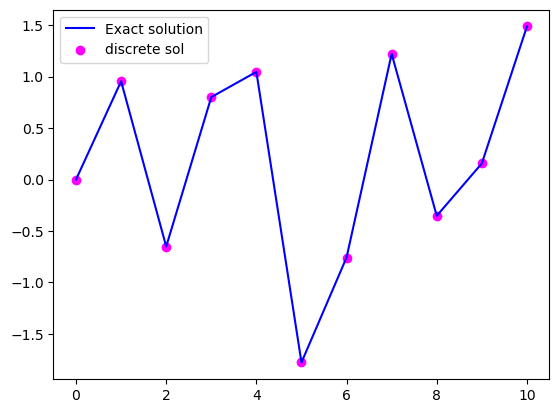

In [36]:
fig,ax=plt.subplots()
ax.plot(num_sol.t, sol(num_sol.t), color="blue", label="Exact solution")
ax.scatter(num_sol.t, num_sol.y[0], color="magenta", label="discrete sol")
ax.legend()

In [39]:
ode_fn_sys=lambda t,y:[t**2*y[1], -t*y[0]]
t_begin=0
t_end=10
y_ini_sys=[1,1]
num_sol_sys=solve_ivp(ode_fn_sys , [t_begin, t_end] , y_ini_sys, method="RK45", t_eval=None)
num_sol_sys.t, num_sol_sys.y[0], num_sol_sys.y[1]

(array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
        1.11100000e-01, 1.11110000e+00, 1.61061819e+00, 1.98777188e+00,
        2.29201974e+00, 2.55050538e+00, 2.77619051e+00, 2.97123784e+00,
        3.16287255e+00, 3.33064976e+00, 3.47823287e+00, 3.62274394e+00,
        3.77276566e+00, 3.90876261e+00, 4.03627210e+00, 4.16255627e+00,
        4.27830824e+00, 4.39041152e+00, 4.50068643e+00, 4.60215506e+00,
        4.70365326e+00, 4.80208360e+00, 4.89255132e+00, 4.98579024e+00,
        5.07484630e+00, 5.15674803e+00, 5.24292150e+00, 5.32410209e+00,
        5.40402264e+00, 5.48387885e+00, 5.55844027e+00, 5.63500591e+00,
        5.70927767e+00, 5.77794435e+00, 5.85072322e+00, 5.91993624e+00,
        5.98595159e+00, 6.05468028e+00, 6.11924683e+00, 6.18456394e+00,
        6.24932209e+00, 6.30958769e+00, 6.37292376e+00, 6.43392497e+00,
        6.49152086e+00, 6.55219562e+00, 6.60957008e+00, 6.66766627e+00,
        6.72543081e+00, 6.77939652e+00, 6.83633318e+00, 6.891213

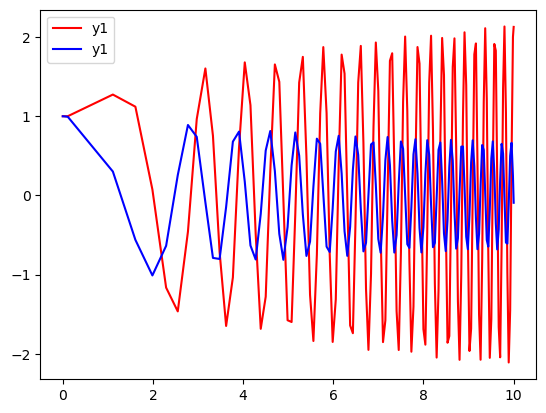

In [42]:
fig,ax1=plt.subplots()
ax1.plot(num_sol_sys.t, num_sol_sys.y[0], color="red", label="y1")
ax1.plot(num_sol_sys.t, num_sol_sys.y[1], color="blue", label="y1")
ax1.legend()